In [24]:
import cv2
import cv2.cv
from PIL import ImageOps, Image, ImageDraw
import os, sys, math
import json
import numpy as np
import openface

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utils import dataset_utils

In [15]:
tmp = openface.align_dlib.MINMAX_TEMPLATE

[[0.         0.17856914]
 [0.00412831 0.31259227]
 [0.0196793  0.44770938]
 [0.04809872 0.5800727 ]
 [0.10028344 0.70349526]
 [0.17999782 0.81208664]
 [0.27627307 0.90467805]
 [0.38463727 0.98006284]
 [0.5073561  1.        ]
 [0.63014114 0.9761118 ]
 [0.7386777  0.89921385]
 [0.8354747  0.80513287]
 [0.91434467 0.6945623 ]
 [0.9643504  0.56826204]
 [0.9887058  0.432444  ]
 [0.9993123  0.29529294]
 [1.         0.15909716]
 [0.09485531 0.07603313]
 [0.15534875 0.02492465]
 [0.2377474  0.01139098]
 [0.32313403 0.02415778]
 [0.4036699  0.05780071]
 [0.56864655 0.0521157 ]
 [0.65128165 0.01543965]
 [0.7379608  0.        ]
 [0.82290924 0.01191543]
 [0.88739765 0.06025707]
 [0.48893312 0.15513189]
 [0.48991537 0.24343018]
 [0.49092147 0.33176517]
 [0.49209353 0.422107  ]
 [0.397399   0.48004663]
 [0.4442625  0.49906778]
 [0.4949509  0.5144414 ]
 [0.54558265 0.49682876]
 [0.59175086 0.47722608]
 [0.194157   0.16926692]
 [0.24600308 0.13693026]
 [0.31000495 0.13735634]
 [0.36378494 0.17794687]


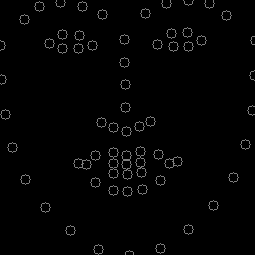

In [47]:
test_img = np.zeros((255,255,3), dtype=np.int8)
test_img.fill(255)
for y,x in tmp:
    y = int(255 * y)
    x = int(255 * x)
    cv2.circle(test_img, (y,x), 5, (255, 255, 255), 1)
    
dataset_utils.imshow(test_img)


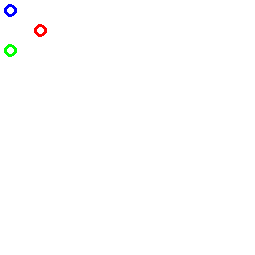

[[ 0.          1.25       12.5       ]
 [ 1.66666667  0.          8.33333333]]


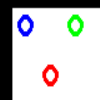

array([75., 25.])

In [82]:
height = width = 255
size = (height, width, 3)
img = np.zeros(size, dtype=np.uint8)
img.fill(255)
cv2.circle(img, (10, 10), 5, (255, 0, 0), 2)
cv2.circle(img, (10, 50), 5, (0, 255, 0), 2)
cv2.circle(img, (40, 30), 5, (0, 0, 255), 2)
dataset_utils.imshow(img)

landmarks = [[10,10], [10, 50], [40, 30]]
landmarks = np.float32(landmarks)

targets = [[25, 25], [75, 25], [50, 75]]
targets = np.float32(targets)
H = cv2.getAffineTransform(landmarks, targets)
print(H)
thumbnail = cv2.warpAffine(img, H, (100, 100))
dataset_utils.imshow(thumbnail)
np.dot(H, np.array([10,50,1]))